In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"./data.csv",index_col= 0)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#筛选特征  去除无关变量
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)#删列

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [7]:
#处理缺失值Age
data['Age']=data['Age'].fillna(data['Age'].mean())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [9]:
#删除缺失数据Embarked    
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
#量化Embarked  类别数为3
labels = data['Embarked'].unique().tolist()
labels

['S', 'C', 'Q']

In [12]:
#labels.index('C')  -->  1

In [13]:
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))
data['Embarked']

PassengerId
1      0
2      1
3      0
4      0
5      0
6      2
7      0
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     2
18     0
19     0
20     1
21     0
22     0
23     2
24     0
25     0
26     0
27     1
28     0
29     2
30     0
      ..
862    0
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    0
872    0
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    0
882    0
883    0
884    0
885    0
886    2
887    0
888    0
889    0
890    1
891    2
Name: Embarked, Length: 889, dtype: int64

In [14]:
#处理性别   只有两个类别
data.loc[:,'Sex'] = data['Sex'] = (data['Sex']=='male').astype("int")

In [15]:
data.head()#预处理完毕

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [18]:
x = data.loc[:,data.columns!="Survived"]

In [20]:
y = data.loc[:,data.columns=="Survived"]

In [24]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

In [29]:
#************索引恢复 不要乱序*************
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index=range(i.shape[0])

In [32]:
clf = DecisionTreeClassifier(random_state=20)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7565543071161048

In [34]:
clf = DecisionTreeClassifier(random_state=20)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7784473953013279

0.8200331971399386


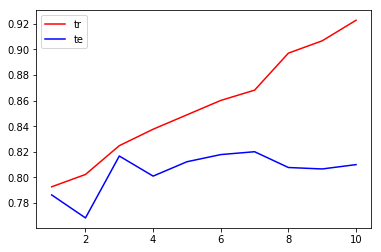

In [38]:
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=20,
                                 max_depth=i+1,
                                 criterion="entropy"
                                )
    clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="r",label="tr")
plt.plot(range(1,11),te,color="b",label="te")
plt.legend()

In [39]:
import numpy as np
gini_threholds = np.linspace(0,0.5,50)
#entropy_threholds = np.linspace(0,1,50)
paramters={
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":[*range(1,50,5)],
    "min_impurity_decrease":gini_threholds
}

#网格搜索  同时调整多个参数，枚举技术
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,paramters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
GS.best_params_#最佳参数组合

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'splitter': 'best'}

In [41]:
GS.best_score_#最佳参数组合下的评判标准

0.815112540192926